In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./data/IMDB-Movie-Data.csv")
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df.shape

(1000, 12)

In [4]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [5]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [6]:
df = df.dropna()
df.shape

(838, 12)

In [7]:
df.nunique()

Rank                  838
Title                 837
Genre                 189
Description           838
Director              524
Actors                834
Year                   11
Runtime (Minutes)      90
Rating                 50
Votes                 837
Revenue (Millions)    789
Metascore              82
dtype: int64

In [8]:
df_bk = df.copy()

In [9]:
df["Metascore"][:500].shape

(500,)

In [10]:
from sklearn.model_selection import train_test_split
X = df["Metascore"][:500].values
y = df["Rating"][:500].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.333, random_state = 0)

In [12]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [13]:

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = StandardScaler().fit_transform(y_train)


In [14]:
# fitting in linear regression
from sklearn.linear_model import LinearRegression
#object regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#checking OLS 
import statsmodels.api as sm
model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          1.210e+04
Date:                Wed, 18 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:32:09   Log-Likelihood:                         -874.55
No. Observations:                 500   AIC:                                      1751.
Df Residuals:                     499   BIC:                                      1755.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1073      0.001    110.015      0.000       0.105       0.109
==============================================================================
Omnibus:                        3.210   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.201   Jarque-Bera (JB):                3.170
Skew:                           0.156   Prob(JB):                        0.205
Kurtosis:                       2.766   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

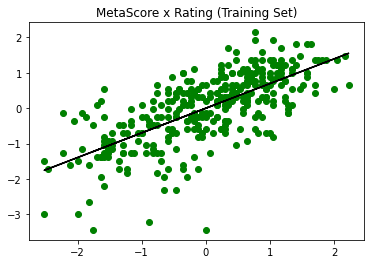

In [16]:
#plot training set
plt.scatter(X_train, y_train, c='green')
plt.plot(X_train, regressor.predict(X_train), c='black')
plt.title('MetaScore x Rating (Training Set)')
plt.show()